# Introduction

#### Informasi Data
1. Data memiliki 57 kolom dan 693.071 baris data
2. sumber data: https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma
   
#### Objective yang ingin dicapai:
1. Dapat memilih 10 independent feature yang dibutuhkan.
2. Accuracy model diata 90%
3. Dapat memprediksi harga sesuai dengan input


### 1. Import library yang dibutuhkan dan load data

In [9]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
import pickle


%matplotlib inline

In [41]:
#load data
df = pd.read_csv("dataset/rideshare_kaggle.csv", sep=",")

In [42]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

**Dapat disimpulkan:**
1. Sesuai dengan tugas yaitu memahami Regression, maka saya putuskan untuk mengambil feature price sebagai y (output nantinya yang akan diprediksi). 
2. Banyak feature yang tidak relevan dengan feature "price". nantinya feature tersebut akan di drop dan hanya menyisakan 10 independen feature yang relevan dengan feature "price".
3. Terdapat null value di kolom price

### 2. Selecting top 10 Independent Features

In [44]:
#mendapatkan korelasi antar kolom
matricscorr = df.corr()

In [45]:
#membuat fungsi untuk mencetak nama kolom yang duplicate
def correlation(dataset, nilai):
    col_corr = set()  # Set dari semua nama kolom yang berkorelasi
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > nilai: # mengambil nilai coeff
                colname = corr_matrix.columns[i]  # mengambil nama kolom
                col_corr.add(colname)
    return col_corr

In [46]:
#assign ke variable dan masukan dataframe serta nilai corelasi diatas 90%
corr_features = correlation(df, 0.9)

#melihat jumlah kolom yang duplicate
len(set(corr_features))

20

Fungsi ini dibuat agar dapat melihat kolom mana yang hampir mirip hingga corelasinya diatas 90%. Dengan ini kita bisa drop salah satu dari kolom tersebut agar dapat mengurangi feature yang diperlukan

In [47]:
#melihat isi dari corr_feature
corr_features

{'apparentTemperature',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'sunriseTime',
 'sunsetTime',
 'temperatureHighTime',
 'temperatureLowTime',
 'temperatureMax',
 'temperatureMaxTime',
 'temperatureMinTime',
 'uvIndexTime',
 'visibility.1',
 'windGust',
 'windGustTime'}

In [48]:
#drop kolom dari dataset sesuai dengan nama-nama yang ada di dalam variabel corr_feature
df = df.drop(corr_features,axis=1)

In [49]:
#melihat unique category dari kolom-kolom tersisa.
df.nunique()

id                    693071
timestamp              36179
hour                      24
day                       17
month                      2
datetime               31350
timezone                   1
source                    12
destination               12
cab_type                   2
product_id                13
name                      13
price                    147
distance                 549
surge_multiplier           7
latitude                  11
longitude                 12
temperature              308
short_summary              9
long_summary              11
precipIntensity           63
precipProbability         29
humidity                  51
windSpeed                291
visibility               227
temperatureHigh          129
temperatureLow           133
icon                       7
dewPoint                 313
pressure                 316
windBearing              195
cloudCover                83
uvIndex                    3
ozone                    274
moonPhase     

Disini terlihat bahwa kolom "id", "timestamp", dan "datetime" memiliki terlalu banyak unique value. Selain itu terdapat kolom "timezone" yang hanya memiliki 1 category.
Kolom - kolom ini akan di drop.

In [50]:
#drop some feature that have too much and one unique values
df = df.drop(["id","timestamp","datetime","timezone"], axis=1)

In [51]:
df.head()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,39.89
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,...,rain,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,40.49
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,...,clear-night,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,35.36
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,...,clear-night,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,34.67
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,...,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,33.10


In [52]:
#memisahkan nama kolom yang type datanya object.
cat= [var for var in df.columns if df[var].dtype=='O']
print(cat)

['source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']


In [53]:
#Membuat class untuk melabel encode kolom-kolom dengan type data object
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array kolom yang akan di encode

    def fit(self,X,y=None):
        return self # yang tidak relevan

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

df = MultiColumnLabelEncoder(columns = ['source', 'destination', 'cab_type', 'product_id', 
                                              'name', 'short_summary', 'long_summary', 'icon']).fit_transform(df)

In [54]:
df.head()
pd.set_option('display.max_columns', None )

In [55]:
#mengisi value null dengan mean
df = df.fillna(df.mean())

In [56]:
#memisahkan ke data train dan test
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['price'], axis=1),
    df['price'],
    test_size=0.3,
    random_state=0)

In [57]:
X_train

,hour,day,month,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,visibility,temperatureHigh,temperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin
653814,0,3,12,10,9,0,9,3,0.57,1.0,42.3647,-71.0542,48.45,5,3,0.0000,0.0,0.95,2.74,6.639,50.99,45.04,2,47.14,1002.76,286,1.00,0,287.9,0.86,0.0888,36.60
591472,16,17,12,3,7,1,1,0,3.07,1.0,42.3505,-71.1054,37.62,5,2,0.0000,0.0,0.88,6.22,8.540,41.44,24.05,2,34.53,1001.67,309,1.00,1,327.0,0.33,0.0217,34.22
243732,8,13,12,5,11,0,9,3,0.64,1.0,42.3647,-71.0542,18.97,0,6,0.0000,0.0,0.65,3.44,9.670,33.83,27.27,1,9.15,1030.07,342,0.02,0,326.5,0.21,0.0001,18.29
343197,8,17,12,10,6,0,8,7,1.69,1.0,42.2148,-71.0330,37.83,3,1,0.0216,1.0,0.91,10.88,3.139,40.61,24.07,6,35.31,1004.44,356,1.00,0,332.2,0.33,0.0221,34.19
234213,21,17,12,3,1,1,3,11,2.46,1.0,42.3505,-71.1054,40.47,4,2,0.0000,0.0,0.71,6.64,9.770,41.44,24.05,5,31.95,999.95,286,0.76,0,354.4,0.33,0.0217,34.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,22,28,11,0,9,1,3,11,3.45,1.0,42.3647,-71.0542,40.43,5,4,0.0000,0.0,0.64,9.08,10.000,42.61,37.60,2,29.27,994.99,295,1.00,0,354.8,0.72,0.0000,33.85
152315,5,1,12,3,11,0,9,3,2.87,1.0,42.3661,-71.0631,34.62,4,1,0.0000,0.0,0.77,2.59,9.937,44.72,34.90,5,28.29,1018.67,298,0.83,0,289.6,0.82,0.0000,31.55
117952,18,28,11,11,8,1,3,11,3.08,1.0,42.3647,-71.0542,40.92,5,4,0.0000,0.0,0.64,9.21,10.000,42.61,37.60,2,29.57,991.21,296,1.00,1,353.1,0.72,0.0000,33.85
435829,2,14,12,10,3,0,11,6,3.17,1.0,42.3559,-71.0550,31.54,5,6,0.0000,0.0,0.67,2.11,10.000,33.96,27.21,2,21.68,1035.30,173,1.00,0,319.8,0.21,0.0001,18.24


In [58]:
#menggunakan mutual_info_regression untuk mengukur relevan antara kolom kolom dengan ouput (kolom "price")
mutual = mutual_info_regression(X_train, y_train)
mutual

In [ ]:
#mengubah menjadi series dan mengurutkan dari yang paling relevan
mutual_info = pd.Series(mutual)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

#### Kesimpulan: 
Kolom yang akan digunakan adalah **"product_id", "name", "distance", "cab_type","source","destination", "surge_multiplier", "icon", "hour", "temperature", "price"**

### 3. New Dataset with only 11 columns

In [2]:
#reload dataset, but with only 11 columns
data = data =pd.read_csv("dataset/rideshare_kaggle.csv", sep=",", usecols =["product_id", "name", "distance",
                                                                            "cab_type","source","destination", 
                                                                            "surge_multiplier", "icon", "hour", 
                                                                            "temperature", "price"])

In [3]:
#rearrange the dataset
data = data[["product_id", "name", "distance",
             "cab_type","source","destination",
             "surge_multiplier", "icon", "hour", 
             "temperature", "price"]]

In [4]:
data.head()

,product_id,name,distance,cab_type,source,destination,surge_multiplier,icon,hour,temperature,price
0,lyft_line,Shared,0.44,Lyft,Haymarket Square,North Station,1.0,partly-cloudy-night,9,42.34,5.0
1,lyft_premier,Lux,0.44,Lyft,Haymarket Square,North Station,1.0,rain,2,43.58,11.0
2,lyft,Lyft,0.44,Lyft,Haymarket Square,North Station,1.0,clear-night,1,38.33,7.0
3,lyft_luxsuv,Lux Black XL,0.44,Lyft,Haymarket Square,North Station,1.0,clear-night,4,34.38,26.0
4,lyft_plus,Lyft XL,0.44,Lyft,Haymarket Square,North Station,1.0,partly-cloudy-night,3,37.44,9.0


In [5]:
#describe data
data["price"].describe()

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [6]:
data.isna().sum()

product_id              0
name                    0
distance                0
cab_type                0
source                  0
destination             0
surge_multiplier        0
icon                    0
hour                    0
temperature             0
price               55095
dtype: int64

Terdapat 55.095 Nan di kolom price dan akan diisi dengan rata-ratanya.

In [7]:
#mengisi Nan dengan rata-rata dan memasukkannya ke variabel
price = data["price"].fillna(data["price"].mean())

In [8]:
#drop kolom price di tabel
data= data.drop(["price"], axis=1)

In [9]:
#menambahkan kolom price yang baru ke dataset
data = data.assign(price = price.values)

In [10]:
data.head()

,product_id,name,distance,cab_type,source,destination,surge_multiplier,icon,hour,temperature,price
0,lyft_line,Shared,0.44,Lyft,Haymarket Square,North Station,1.0,partly-cloudy-night,9,42.34,5.0
1,lyft_premier,Lux,0.44,Lyft,Haymarket Square,North Station,1.0,rain,2,43.58,11.0
2,lyft,Lyft,0.44,Lyft,Haymarket Square,North Station,1.0,clear-night,1,38.33,7.0
3,lyft_luxsuv,Lux Black XL,0.44,Lyft,Haymarket Square,North Station,1.0,clear-night,4,34.38,26.0
4,lyft_plus,Lyft XL,0.44,Lyft,Haymarket Square,North Station,1.0,partly-cloudy-night,3,37.44,9.0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


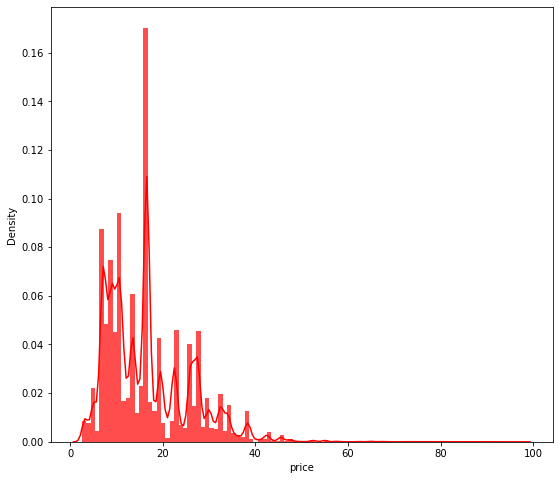

In [11]:
#plot kolom price
plt.figure(figsize=(9, 8))
sns.distplot(data["price"], color='r', bins=100, hist_kws={'alpha': 0.7});

**Note:
Saya tidak menghapus outliers karena saat saya hapus akurasi model turun drastis.**

### 4. Normalisasi kolom Numerical

In [12]:
#mencetak nama kolom yang bertipe data numeric
numerical = [var for var in data.columns if data[var].dtype!='O']
print(numerical)

['distance', 'surge_multiplier', 'hour', 'temperature', 'price']


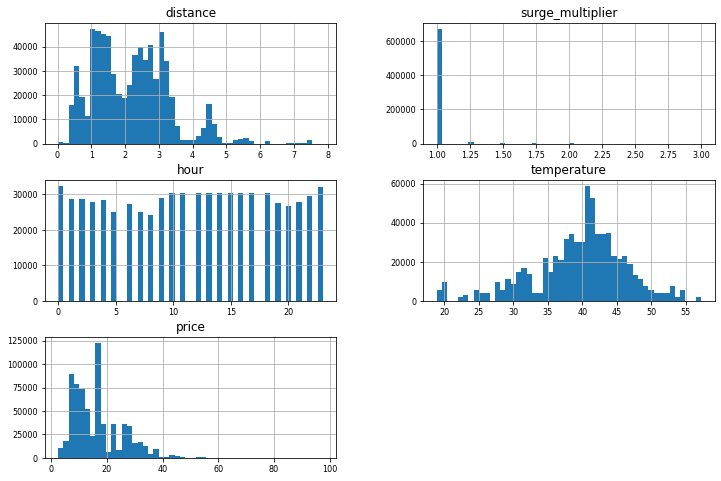

In [13]:
#plot kolom numeric
data[numerical].hist(figsize=(12, 8), bins=50, xlabelsize=8, ylabelsize=8);

Dari histogram terlihat diperlukan adanya normalisasi terhadap kolom distance, surge_multiplier, hour, dan temperature untuk meningkatkan akurasi model nantinya.

In [14]:
#Normalisasi data numerical
for col in ['distance', 'surge_multiplier', 'hour', 'temperature']:
    minus = data[col].min()
    maxim = data[col].max()
    
    data[col] = data[col].apply(lambda v: (v - minus)/(maxim - minus))

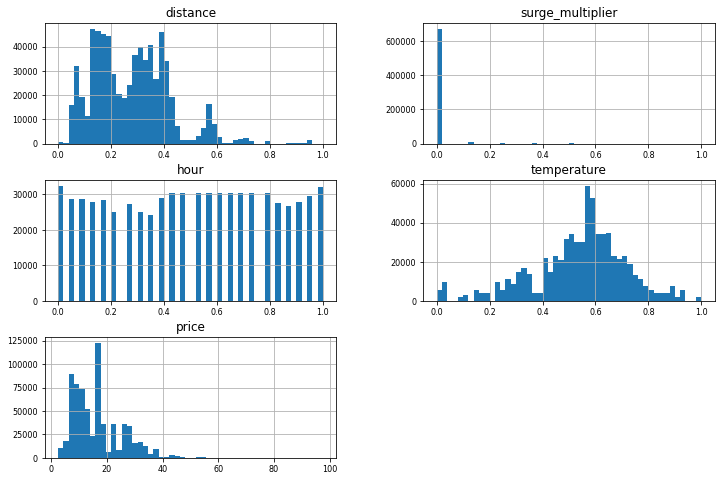

In [15]:
#plot kembali data
data[numerical].hist(figsize=(12, 8), bins=50, xlabelsize=8, ylabelsize=8);

### 5. One Hot Encode Kolom Categorical

In [16]:
#nama kolom yang bertype data object
categorical = [var for var in data.columns if data[var].dtype=='O']
print(categorical)

['product_id', 'name', 'cab_type', 'source', 'destination', 'icon']


In [17]:
#melihat value dari kategori yang ada di kolom product_id
data['product_id'].value_counts()

9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_lux                                51235
lyft                                    51235
lyft_plus                               51235
lyft_premier                            51235
lyft_luxsuv                             51235
lyft_line                               51233
Name: product_id, dtype: int64

In [18]:
#melihat value dari kategori yang ada di kolom name
data['name'].value_counts()

Black SUV       55096
WAV             55096
UberXL          55096
Taxi            55095
Black           55095
UberX           55094
UberPool        55091
Lux             51235
Lux Black XL    51235
Lyft            51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64

Terdapat kemiripan antara kolom product_id dan name, sehingga saya memutuskan untuk menghapus kolom product_id

In [19]:
#drop kolom product_id
data = data.drop("product_id", axis=1)

In [20]:
#melihat value dari kategori yang ada di kolom cab_type
data['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [21]:
#melihat value dari kategori yang ada di kolom source
data['source'].value_counts()

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

In [22]:
#melihat value dari kategori yang ada di kolom destination
data['destination'].value_counts()

Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64

In [23]:
#melihat value dari kategori yang ada di kolom icon
data['icon'].value_counts()

 cloudy                  218895
 partly-cloudy-night     158030
 partly-cloudy-day       115404
 rain                    104556
 clear-night              60294
 clear-day                26832
 fog                       9060
Name: icon, dtype: int64

In [25]:
#kembali assign nama kolom categorical ke variabel categorical
categorical = [var for var in data.columns if data[var].dtype=='O']
print(categorical)

['name', 'cab_type', 'source', 'destination', 'icon']


In [26]:
#Melakukan Onehot Encoding data pada kolom categorical
def encoding_data(data):
    #import library
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # encode kolom categorical 
    df_encode = pd.DataFrame(encoder.fit_transform(data[categorical]))
    #mengambil nama sesuai kategori
    df_encode.columns = encoder.get_feature_names(categorical)
    
    #menghapus kolom yang ada di array kategorical
    new_df = data.drop(categorical ,axis=1)
    
    #menggambungkan kolom baru yang sudah di encode dan kolom lama
    new_df = pd.concat([df_encode, new_df], axis=1)
    return new_df

In [27]:
#assign ke variabel baru
onehot_data = encoding_data(data)

In [28]:
onehot_data.head()

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,...,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,distance,surge_multiplier,hour,temperature,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.053571,0.0,0.391304,0.611590,5.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.053571,0.0,0.086957,0.643957,11.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.053571,0.0,0.043478,0.506917,7.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.053571,0.0,0.173913,0.403811,26.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.053571,0.0,0.130435,0.483686,9.0


In [29]:
#drop Nan value yang ada
onehot_data = onehot_data.dropna()

In [32]:
pd.set_option('display.max_columns', None )
onehot_data

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,distance,surge_multiplier,hour,temperature,price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.053571,0.0,0.391304,0.611590,5.000000
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.053571,0.0,0.086957,0.643957,11.000000
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.053571,0.0,0.043478,0.506917,7.000000
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.053571,0.0,0.173913,0.403811,26.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.053571,0.0,0.130435,0.483686,9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.125000,0.0,1.000000,0.473506,13.000000
693067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.125000,0.0,1.000000,0.473506,9.500000
693068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.125000,0.0,1.000000,0.473506,16.545125
693069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.125000,0.0,1.000000,0.473506,27.000000


In [32]:
#split ke train dan test set
x_train,x_test,y_train,y_test=train_test_split(onehot_data.drop(labels=['price'], axis=1),
    onehot_data['price'],
    test_size=0.3,
    random_state=0)

In [33]:
#membuat model dan fit modelnya
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [34]:
#
print("slope: ", lin_reg.coef_)

print("Intercept: ", lin_reg.intercept_)

slope:  [-3.29132429e+09 -3.29132428e+09  8.20747243e+09  8.20747243e+09
  8.20747244e+09  8.20747242e+09  8.20747242e+09  8.20747242e+09
 -3.29132429e+09 -3.29132430e+09 -3.29132430e+09 -3.29132429e+09
 -3.29132430e+09  8.18231276e+11  8.29730073e+11 -5.71430808e+10
 -5.71430808e+10 -3.82935872e+10 -3.82935872e+10 -5.71430808e+10
 -3.82935872e+10 -3.82935872e+10 -5.71430808e+10 -3.82935872e+10
 -3.82935872e+10 -5.71430808e+10 -5.71430808e+10 -1.59690503e+11
 -1.59690503e+11 -1.40841010e+11 -1.40841010e+11 -1.59690503e+11
 -1.40841010e+11 -1.40841010e+11 -1.59690503e+11 -1.40841010e+11
 -1.40841010e+11 -1.59690503e+11 -1.59690503e+11  1.63064975e+11
  1.63064975e+11  1.63064975e+11  1.63064975e+11  1.63064975e+11
  1.63064975e+11  1.63064975e+11  2.05538555e+01  3.67692703e+01
  9.28600528e-03  1.66060878e-02]
Intercept:  -791519633902.6521


In [35]:
#checks the model with R2 score
lin_reg.score(x_train, y_train)

0.9184432100180292

In [39]:
y_test = lin_reg.predict(x_test)
print("predict response: ", y_test, sep="\n")

predict response: 
[ 6.73779297 36.12585449 12.57836914 ...  3.93310547 31.85681152
  2.6036377 ]


In [40]:
#menyimpan data ke file model.pkl
pickle.dump(lin_reg, open('model.pkl','wb'))

## Kesimpulan
1. Dari 57 kolom saya mengambil 11 kolom yang dibutuhkan. Namun, terdapat nilai yang sama antara kolom product_id dan name, sehingga saya memutuskan untuk menghapus kolom product_id.
2. Value Nan pada price diisi dengan rata-rata.
3. Tidak menghapus outliers karena akan menurunkan akurasi model
4. Menormalisasi kolom bertype dan numerical dan menggunakan one hot encoder terhadap kolom bertype data object.
5. Membagi data ke 70% train data dan 30% test
6. Model yang digunakan adalah Multiple Linear Regression
7. Menguji akurasi dengan R2 score, dan mendapatkan 91% akurasi